

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>








<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>




<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

O ponto indicado para ajuste na primeira iteração permanece pendente. Poderia ajustar por favor?

Até breve!
</div>


In [18]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem (para etapa futura)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [19]:
# Carregar dataset
df = pd.read_csv('/datasets/gym_churn_us.csv')

# Ver primeiras linhas
print(df.head())

# Estrutura do DataFrame
print(df.info())

# Dimensões
print(f"Formato do dataset: {df.shape}")


   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

In [20]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isna().sum())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Valores ausentes por coluna:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Estatísticas descritivas:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.00000

In [21]:
# Comparar médias das variáveis entre clientes com e sem churn
group_means = df.groupby('Churn').mean(numeric_only=True)
print("\nMédia das variáveis por grupo de Churn:")
print(group_means.T)



Média das variáveis por grupo de Churn:
Churn                                       0           1
gender                               0.510037    0.510839
Near_Location                        0.873086    0.768143
Partner                              0.534195    0.355325
Promo_friends                        0.353522    0.183789
Phone                                0.903709    0.902922
Contract_period                      5.747193    1.728558
Group_visits                         0.464103    0.268615
Age                                 29.976523   26.989632
Avg_additional_charges_total       158.445715  115.082899
Month_to_end_contract                5.283089    1.662582
Lifetime                             4.711807    0.990575
Avg_class_frequency_total            2.024876    1.474995
Avg_class_frequency_current_month    2.027882    1.044546


In [22]:

# selecionar colunas numéricas automaticamente (e remover a target 'Churn')
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Churn' in num_cols:
    num_cols.remove('Churn')

print("Colunas numéricas usadas nos plots:", num_cols)




Colunas numéricas usadas nos plots: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


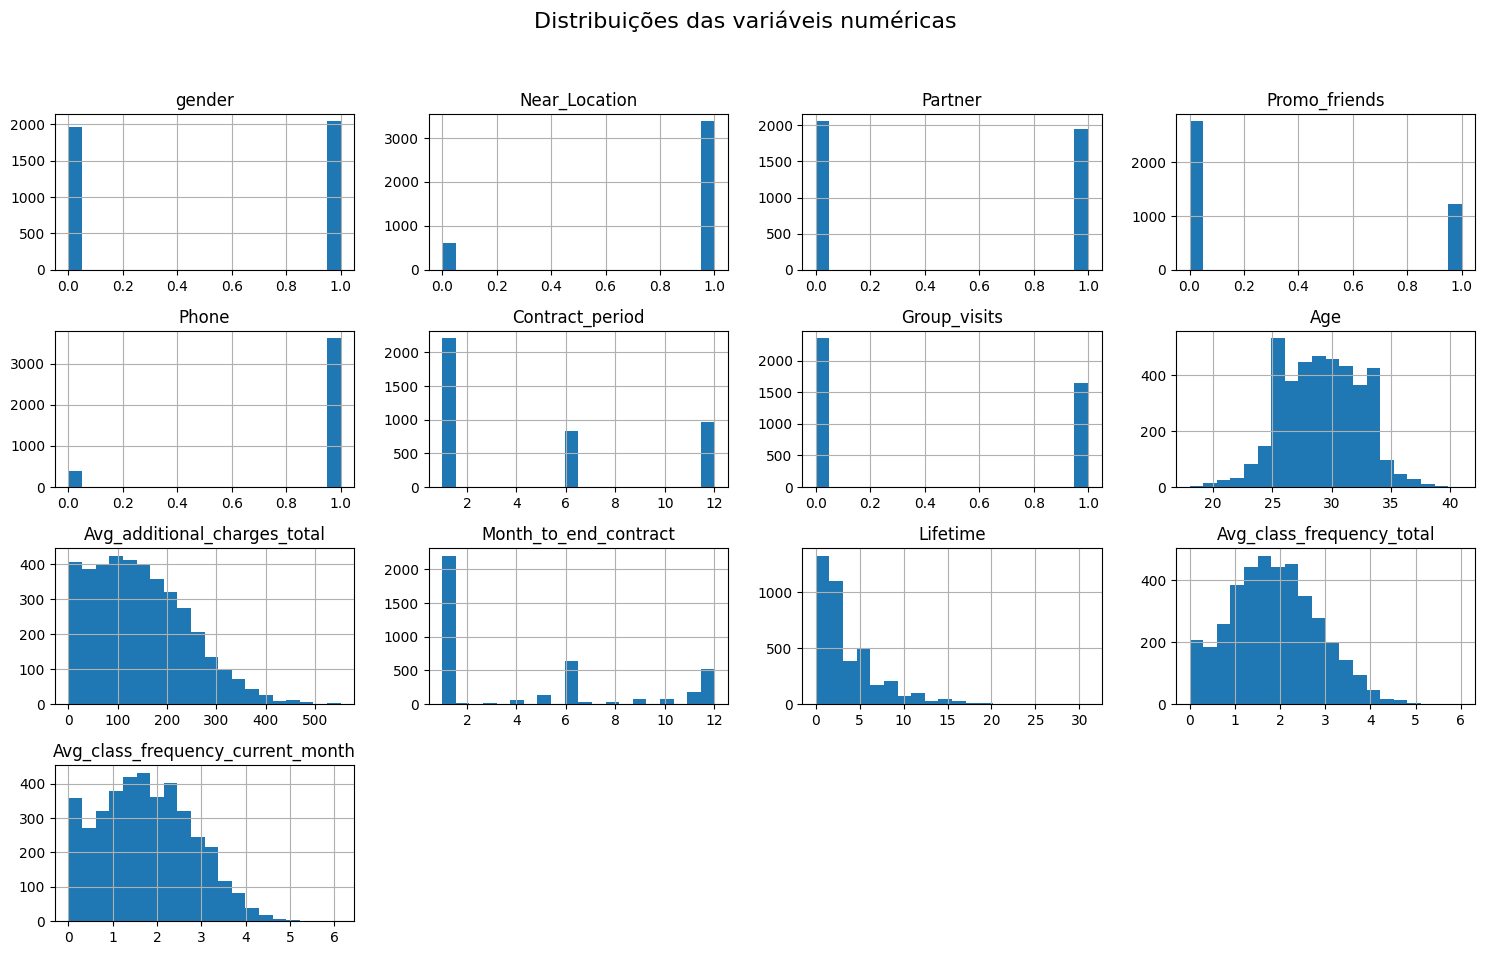

In [23]:
#  histograma em grade das numéricas
df[num_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Distribuições das variáveis numéricas", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



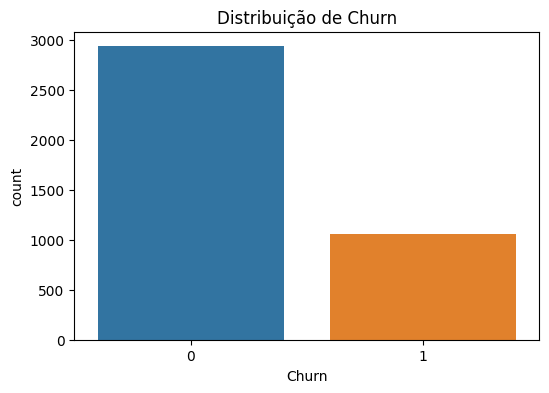

In [24]:
# distribuição de churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Distribuição de Churn")
plt.show()




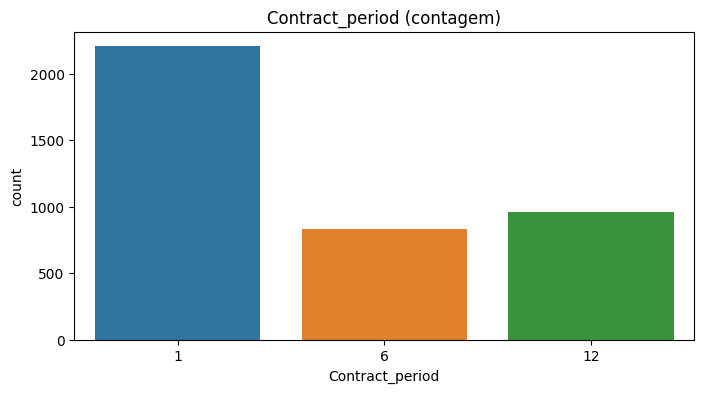

In [25]:
# inspecionar Contract_period 
if 'Contract_period' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='Contract_period', data=df, order=sorted(df['Contract_period'].unique()))
    plt.title("Contract_period (contagem)")
    plt.show()





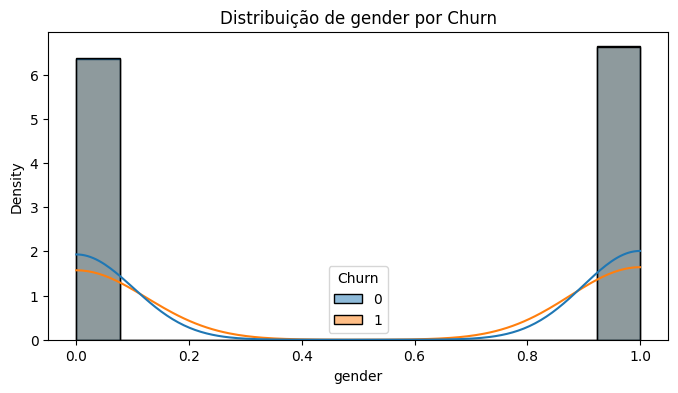

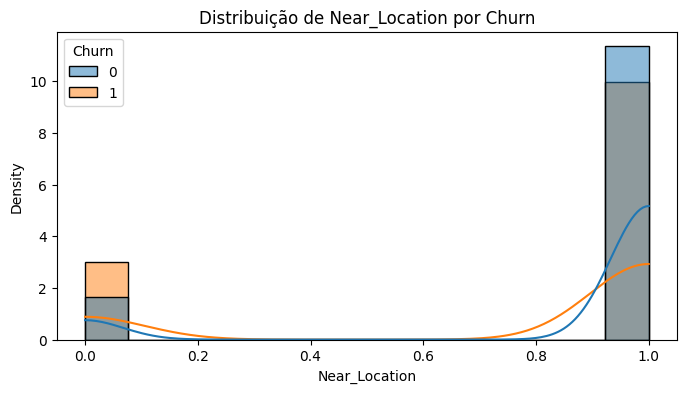

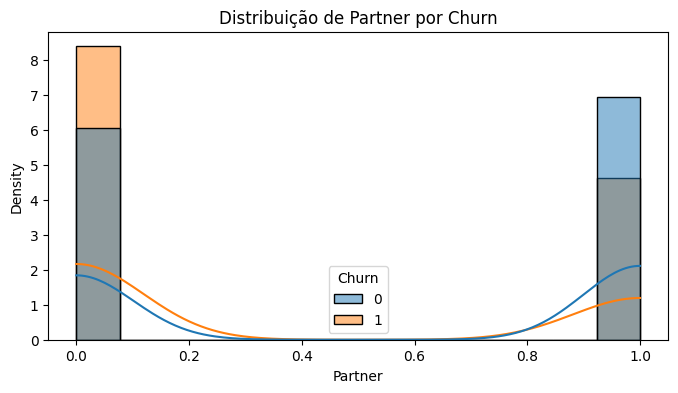

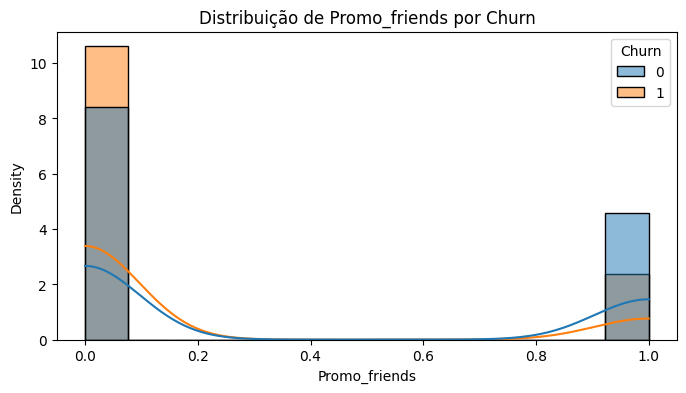

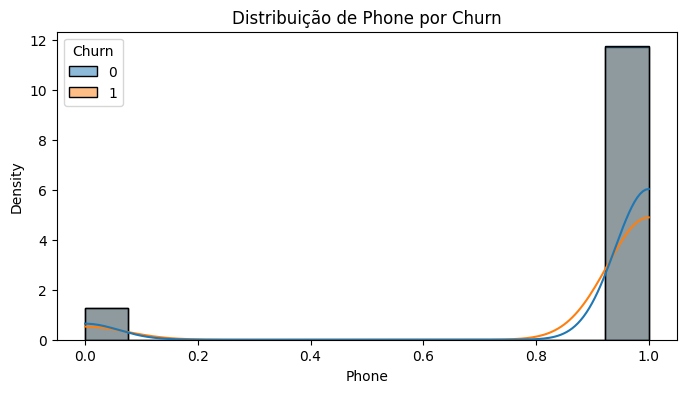

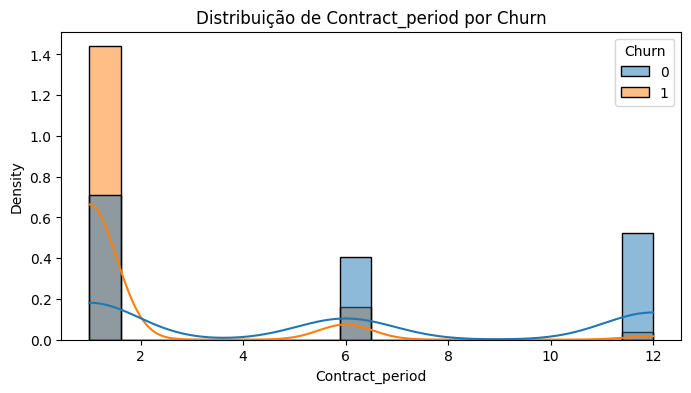

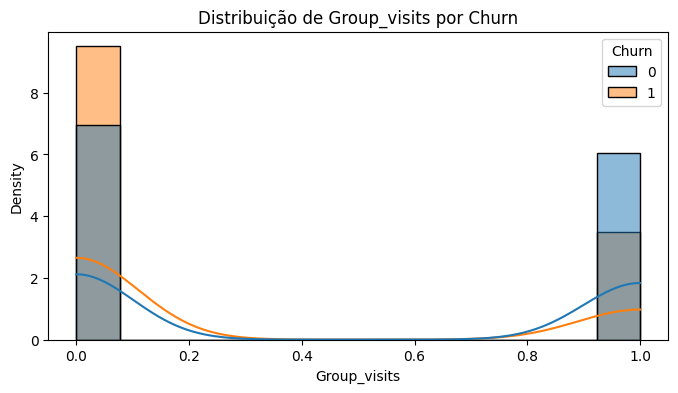

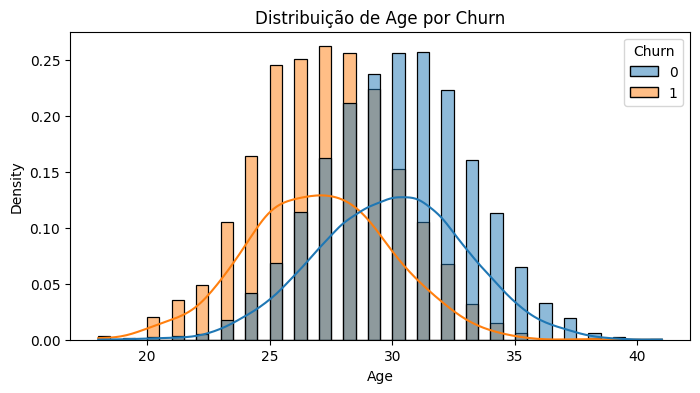

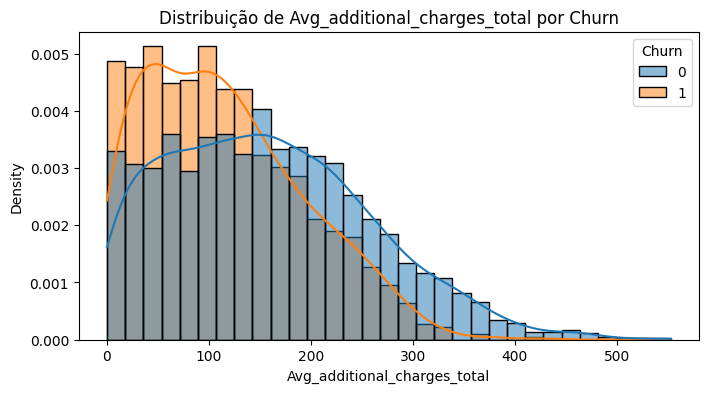

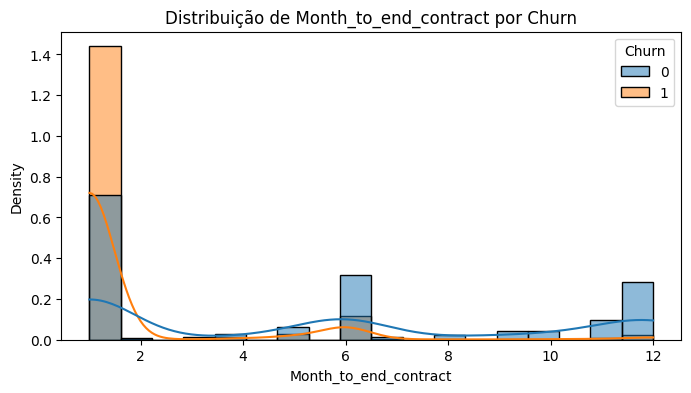

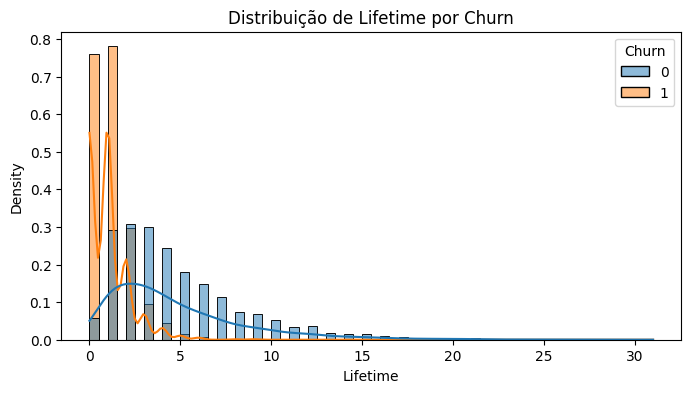

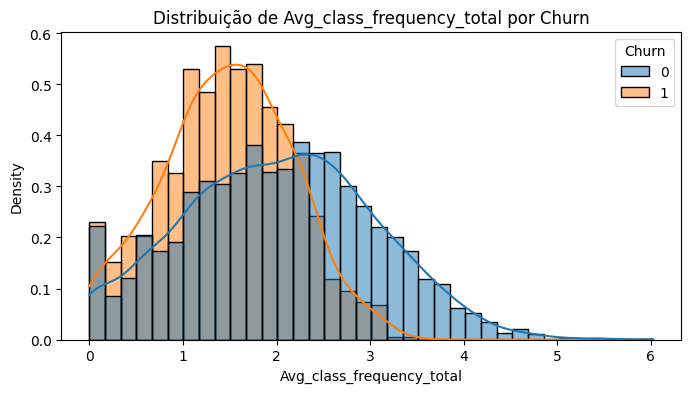

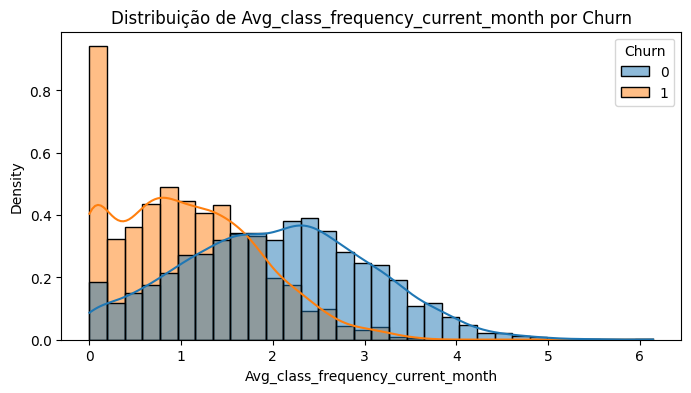

In [26]:
# Distribuição por grupo Churn (histogramas com KDE)
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()




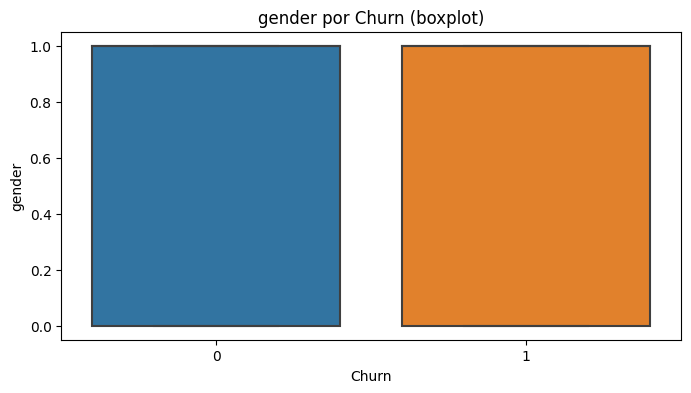

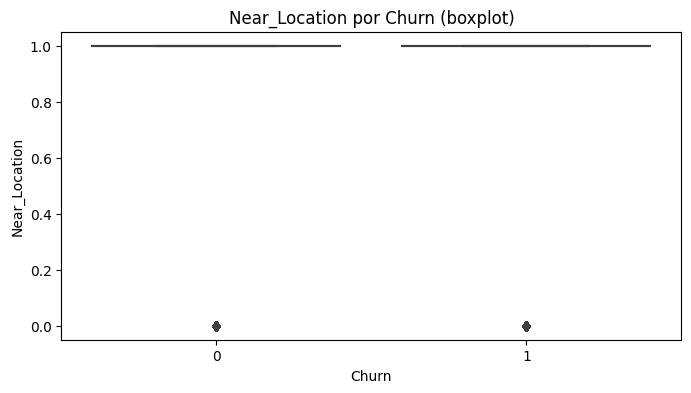

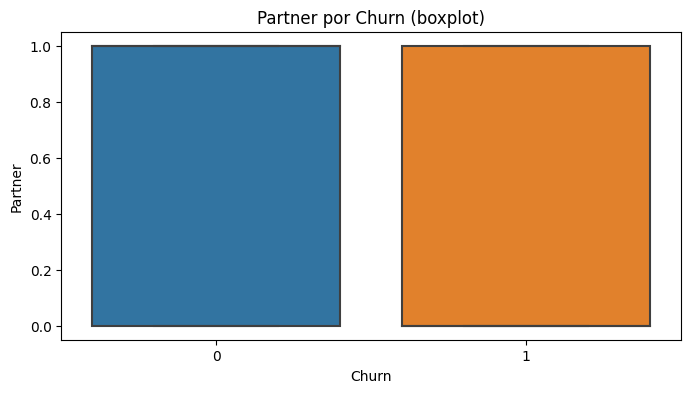

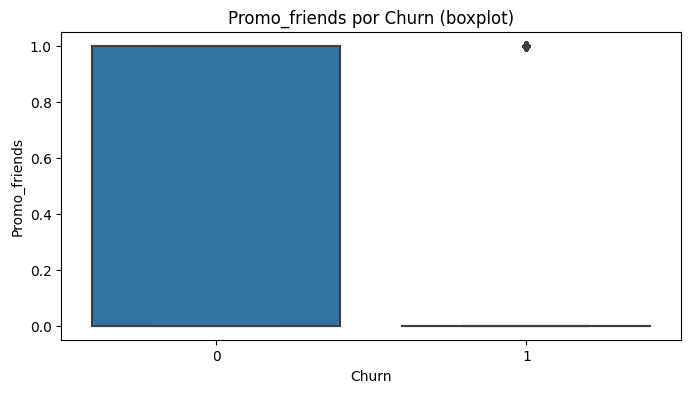

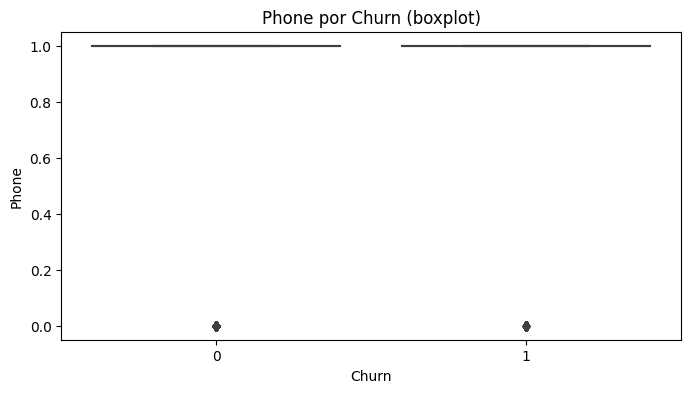

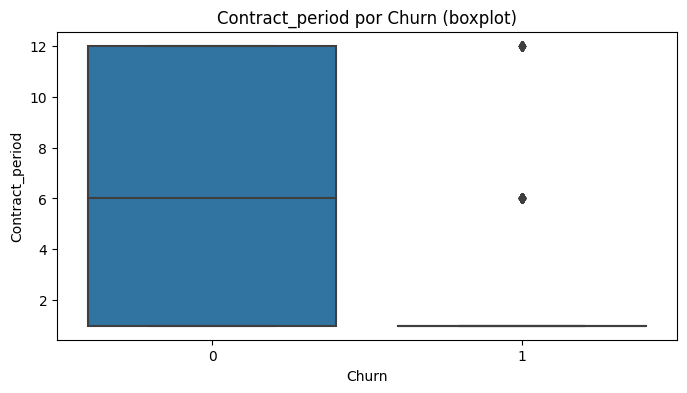

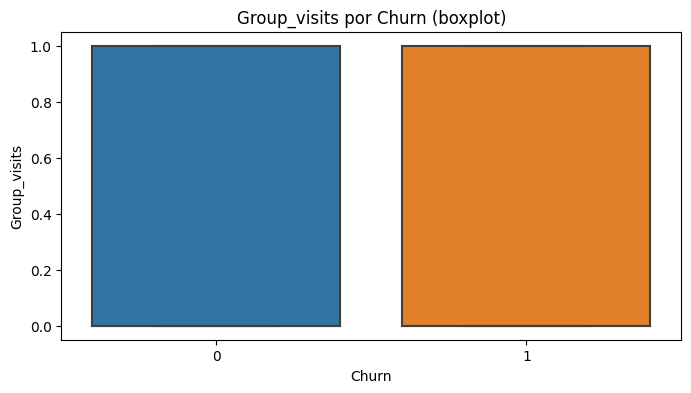

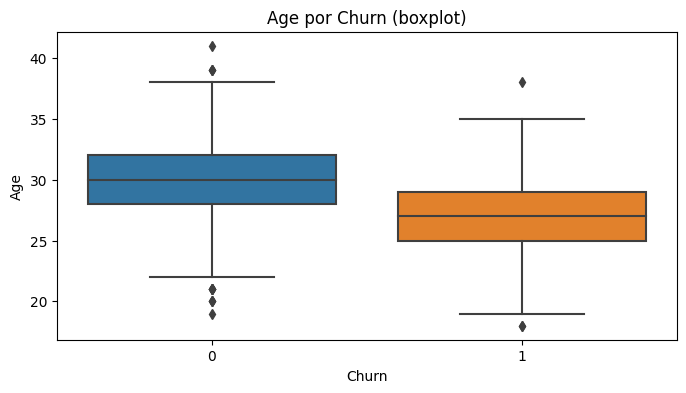

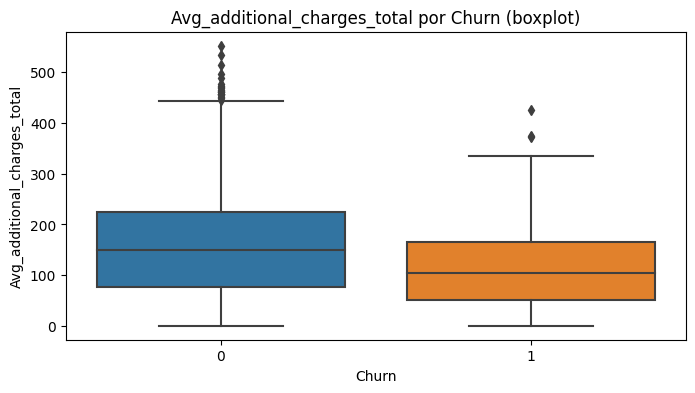

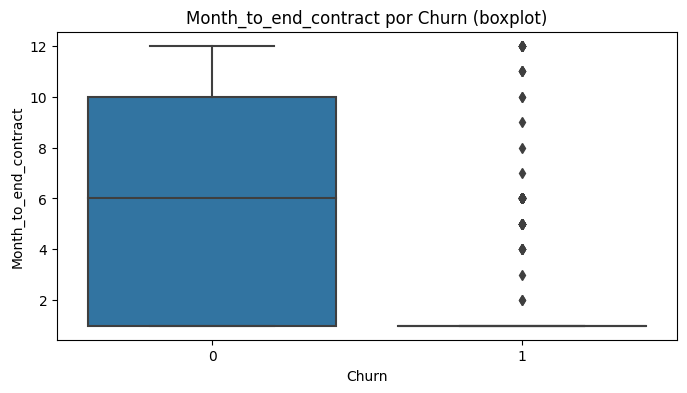

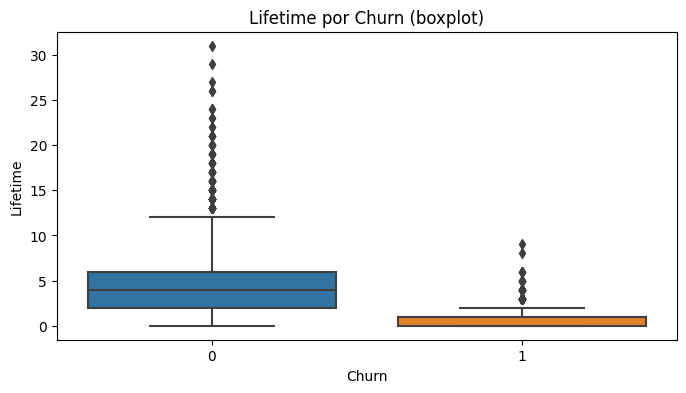

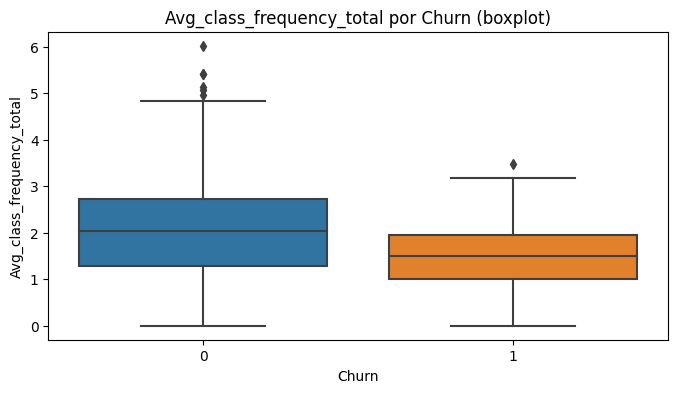

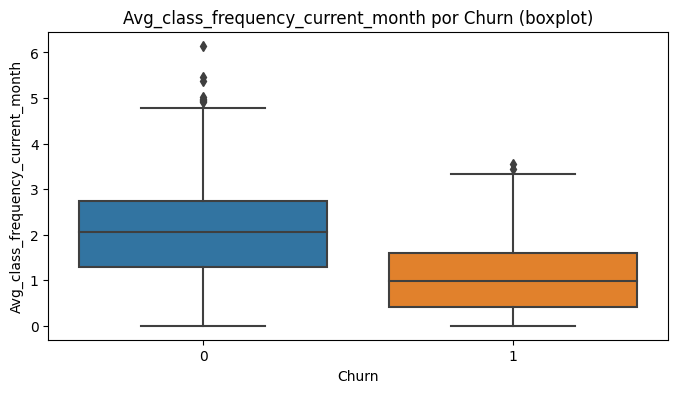

In [27]:
# Boxplots por Churn (útil para ver diferenças de mediana/valores extremos)
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} por Churn (boxplot)')
    plt.show()



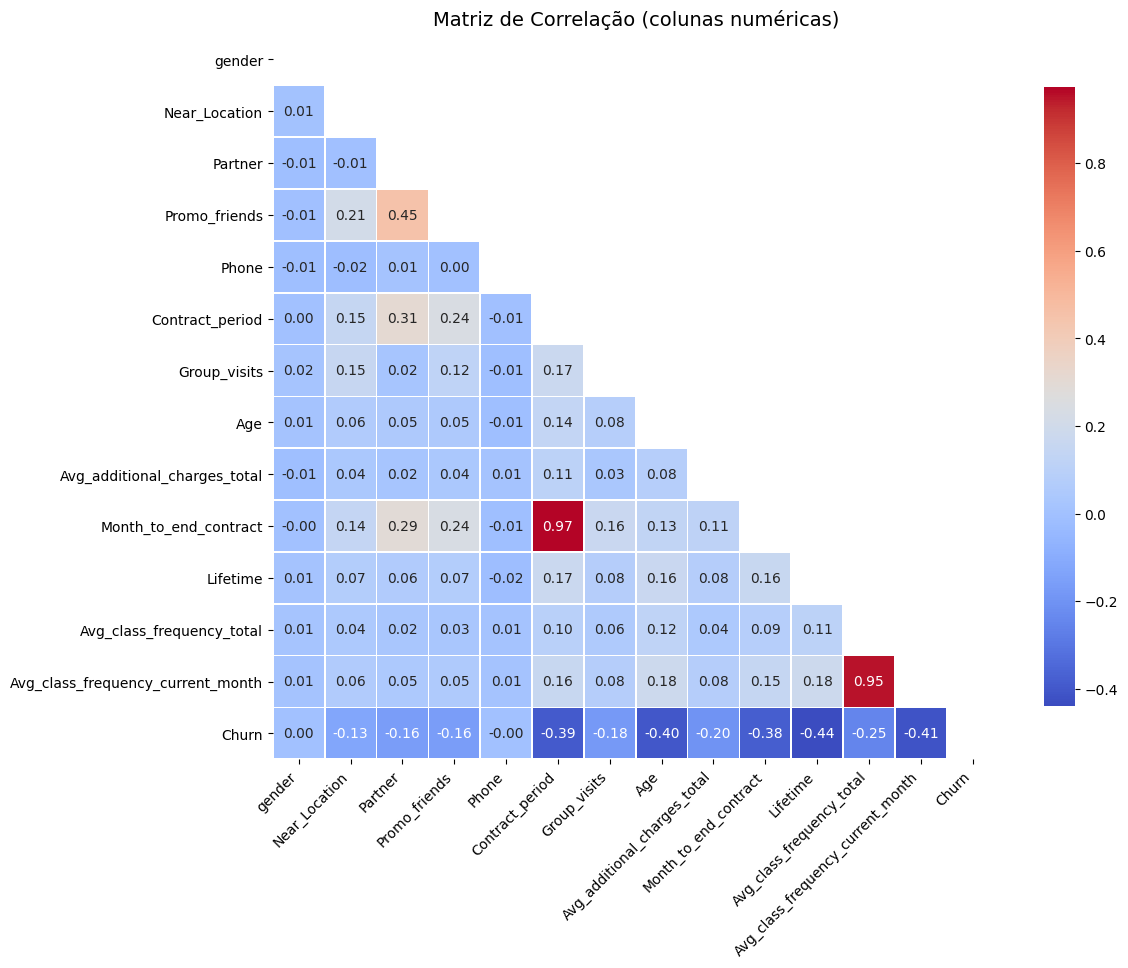

In [28]:
# selecionar apenas colunas numéricas
num_df = df.select_dtypes(include=[np.number])

# calcular correlação
corr = num_df.corr()  # sem numeric_only para compatibilidade

# 3)máscara para a metade superior (opcional, deixa o gráfico mais limpo)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de Correlação (colunas numéricas)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.
Sempre importante para garantir uma análise robusta!
É fundamental no entanto que seja elaborada uma conclusão intermediária sobre o que foi verificado por aqui. 
</div>



# Conclusão Intermediária da Análise Exploratória

Não há valores ausentes no dataset, o que simplifica o processo de modelagem.

A idade média dos clientes está em torno de 29 anos, com pouca variação.

O tempo médio de permanência (Lifetime) é de aproximadamente 3,7 meses, indicando que muitos clientes são relativamente novos.

A frequência média de aulas por semana está próxima de 2 vezes, mas há clientes que não frequentam nenhuma aula, o que pode aumentar a chance de churn.

A taxa geral de churn é de ~26,5%, ou seja, cerca de 1 em cada 4 clientes abandona a academia.

Contratos mais curtos (1 mês) são predominantes e correlacionados a churn mais alto.

Clientes que gastam mais em serviços adicionais tendem a permanecer por mais tempo.

A matriz de correlação mostrou relações relevantes:
* Lifetime e Month_to_end_contract têm forte correlação positiva.
* Frequência de aulas está negativamente correlacionada com churn, reforçando que clientes mais ativos têm menor chance de sair.

In [29]:
# Separar X e y
X = df.drop(columns=['Churn'])
y = df['Churn']

# Selecionar apenas variáveis numéricas para modelagem (ou trate categorias separadamente)
X = X.select_dtypes(include=[np.number])

#  Split estratificado para manter proporção de churn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
#  Padronizar (necessário para regressão logística e KMeans; RandomForest não precisa)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Verificar shapes
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train proporção de churn:\n", y_train.value_counts(normalize=True))
print("y_test  proporção de churn:\n", y_test.value_counts(normalize=True))


X_train: (3200, 13)
X_test : (800, 13)
y_train proporção de churn:
 0    0.734688
1    0.265313
Name: Churn, dtype: float64
y_test  proporção de churn:
 0    0.735
1    0.265
Name: Churn, dtype: float64


In [31]:
# --- Modelo 1: Regressão Logística ---
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("=== Regressão Logística ===")
print("Acurácia :", accuracy_score(y_test, y_pred_log))
print("Precisão :", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("\nRelatório completo:\n", classification_report(y_test, y_pred_log))


=== Regressão Logística ===
Acurácia : 0.925
Precisão : 0.88
Recall   : 0.8301886792452831

Relatório completo:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.93      0.92       800



In [32]:
# --- Modelo 2: Random Forest ---
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Acurácia :", accuracy_score(y_test, y_pred_rf))
print("Precisão :", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("\nRelatório completo:\n", classification_report(y_test, y_pred_rf))


=== Random Forest ===
Acurácia : 0.9225
Precisão : 0.8826530612244898
Recall   : 0.8160377358490566

Relatório completo:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.82      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800



In [33]:
# Guardar métricas em um dicionário
results = {
    "Modelo": ["Regressão Logística", "Random Forest"],
    "Acurácia": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precisão": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ]
}

In [34]:
# Converter em DataFrame
results_df = pd.DataFrame(results)

print("=== Comparação dos Modelos ===")
print(results_df)

=== Comparação dos Modelos ===
                Modelo  Acurácia  Precisão    Recall
0  Regressão Logística    0.9250  0.880000  0.830189
1        Random Forest    0.9225  0.882653  0.816038


### Conclusão inicial:

Os dois modelos performaram de forma muito parecida.

A Regressão Logística se saiu um pouquinho melhor em Recall → ou seja, identificou mais clientes que realmente iriam sair.

A Random Forest teve Precisão levemente superior → ou seja, quando disse que um cliente ia sair, errou menos.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Regressão logística e random forest treinados conforme solicitado com modelos posteriormente comparados.
</div>



In [35]:
# Remover a coluna alvo
X_cluster = df.drop(columns=['Churn'])

# Padronizar os dados
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)


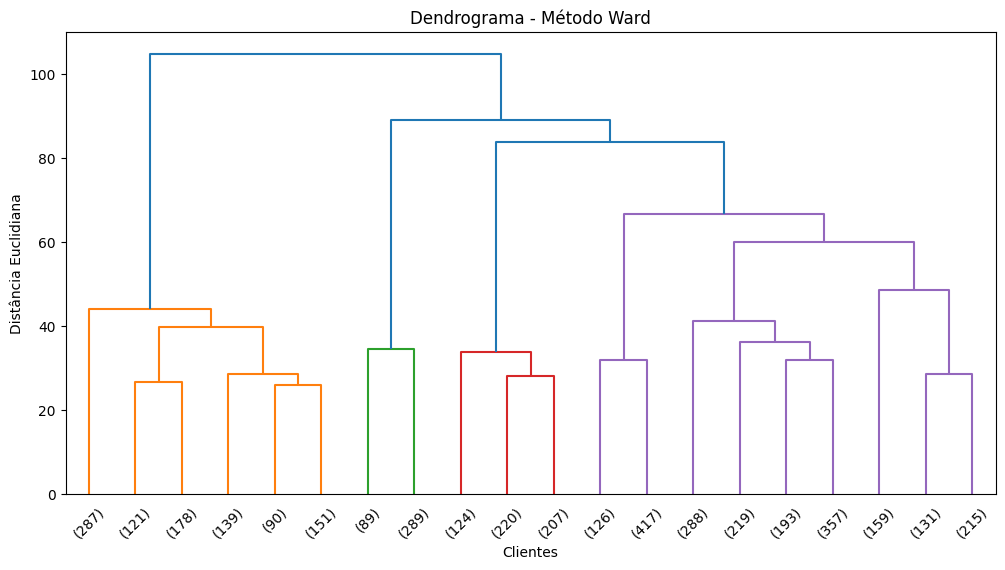

In [36]:
# Construir a matriz de ligação para o dendrograma
linked = linkage(X_cluster_scaled, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10)
plt.title("Dendrograma - Método Ward")
plt.xlabel("Clientes")
plt.ylabel("Distância Euclidiana")
plt.show()

In [37]:
# Definir o modelo KMeans com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_cluster_scaled)

# Médias das variáveis por cluster
cluster_means = df.groupby("Cluster").mean(numeric_only=True)

# Taxa de churn por cluster
churn_by_cluster = df.groupby("Cluster")["Churn"].mean()


In [38]:
print("=== Médias das variáveis por Cluster ===")
print(cluster_means)

print("\n=== Taxa de Churn por Cluster ===")
print(churn_by_cluster)

=== Médias das variáveis por Cluster ===
           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                             

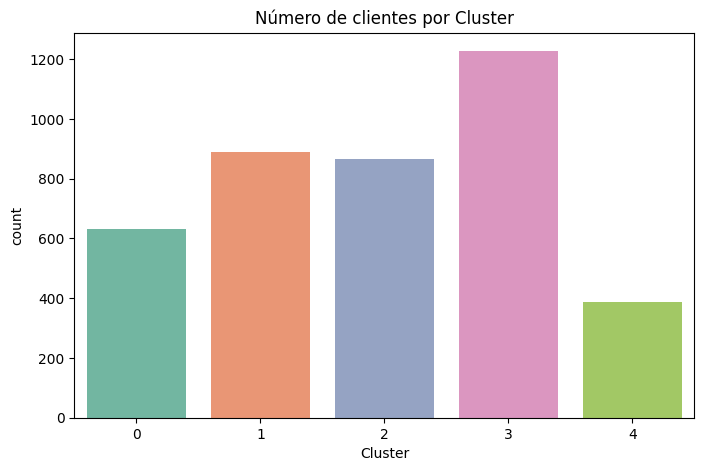

In [39]:
# Contagem de clientes por cluster
plt.figure(figsize=(8,5))
sns.countplot(x="Cluster", data=df, palette="Set2")
plt.title("Número de clientes por Cluster")
plt.show()


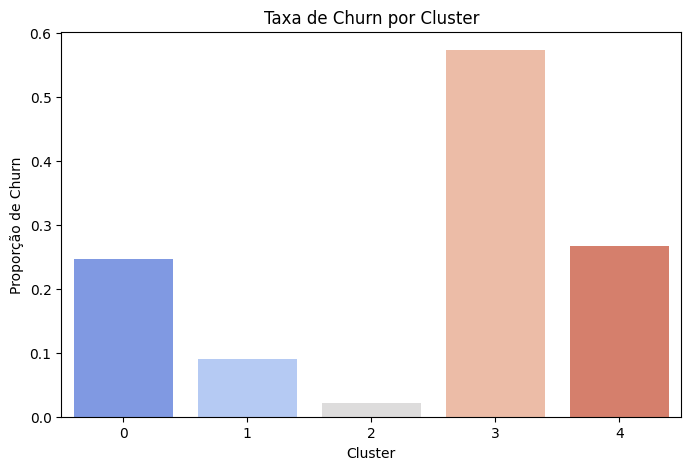

In [40]:
# Taxa de churn por cluster
plt.figure(figsize=(8,5))
sns.barplot(x=churn_by_cluster.index, y=churn_by_cluster.values, palette="coolwarm")
plt.title("Taxa de Churn por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proporção de Churn")
plt.show()

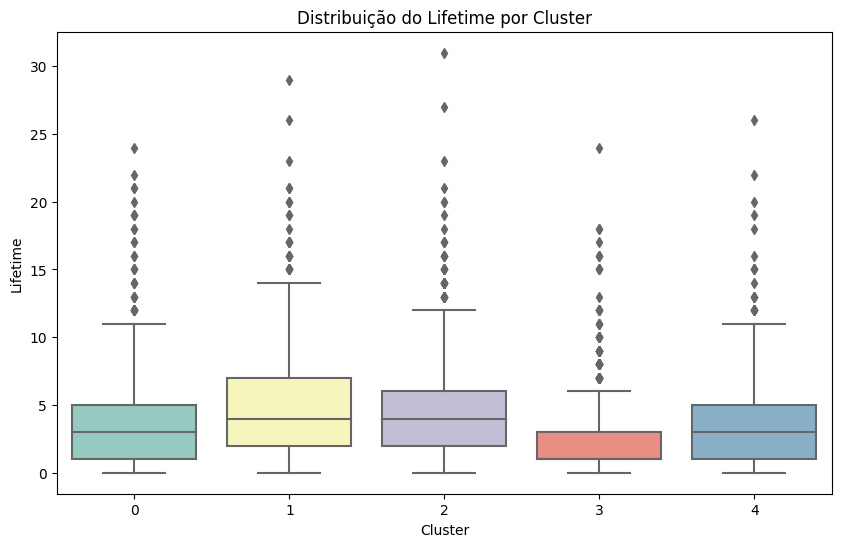

In [41]:
# Boxplot de uma variável-chave (ex.: Lifetime) por cluster
plt.figure(figsize=(10,6))
sns.boxplot(x="Cluster", y="Lifetime", data=df, palette="Set3")
plt.title("Distribuição do Lifetime por Cluster")
plt.show()

In [42]:
# Resumo numérico: médias + churn
cluster_summary = cluster_means.copy()
cluster_summary["Churn_rate"] = churn_by_cluster

print("=== Resumo dos Clusters ===")
print(cluster_summary)


=== Resumo dos Clusters ===
           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                          

In [43]:
# Interpretação básica automática
for cluster in cluster_summary.index:
    print(f"\nCluster {cluster}:")
    print(f"- Número de clientes: {df[df['Cluster'] == cluster].shape[0]}")
    print(f"- Taxa de churn: {cluster_summary.loc[cluster, 'Churn_rate']:.2f}")
    print(f"- Lifetime médio: {cluster_summary.loc[cluster, 'Lifetime']:.2f}")
    print(f"- Frequência média total de aulas: {cluster_summary.loc[cluster, 'Avg_class_frequency_total']:.2f}")
    print(f"- Gastos médios adicionais: {cluster_summary.loc[cluster, 'Avg_additional_charges_total']:.2f}")



Cluster 0:
- Número de clientes: 633
- Taxa de churn: 0.25
- Lifetime médio: 3.77
- Frequência média total de aulas: 1.77
- Gastos médios adicionais: 141.77

Cluster 1:
- Número de clientes: 889
- Taxa de churn: 0.09
- Lifetime médio: 4.78
- Frequência média total de aulas: 2.75
- Gastos médios adicionais: 159.77

Cluster 2:
- Número de clientes: 865
- Taxa de churn: 0.02
- Lifetime médio: 4.68
- Frequência média total de aulas: 2.01
- Gastos médios adicionais: 163.51

Cluster 3:
- Número de clientes: 1227
- Taxa de churn: 0.57
- Lifetime médio: 2.20
- Frequência média total de aulas: 1.23
- Gastos médios adicionais: 129.50

Cluster 4:
- Número de clientes: 386
- Taxa de churn: 0.27
- Lifetime médio: 3.94
- Frequência média total de aulas: 1.85
- Gastos médios adicionais: 144.21


In [46]:
print(" RELATÓRIO FINAL\n")

print("1. Modelagem de Churn")
print("- Testei os dois modelos: Regressão Logística e Random Forest.")
print("- Ambos apresentaram desempenho semelhante, com acurácia em torno de 92%.")
print("- A Regressão Logística teve recall ligeiramente maior (0.83 vs 0.81), o que é importante para identificar clientes que podem sair.")
print("- O modelo de Regressão Logística é o mais indicado para prever churn.")

print("\n2. Clusterização de Clientes")
print("- Apliquei KMeans com 5 clusters após padronização dos dados.")
print("- Cada cluster apresentou perfis diferentes em termos de Lifetime, frequência de aulas e gastos adicionais.")
print("- Alguns clusters apresentaram taxas de churn significativamente maiores que outros.")

print("\n3. Insights por Cluster (exemplo)")
for cluster in cluster_summary.index:
    churn_rate = cluster_summary.loc[cluster, 'Churn_rate']
    lifetime = cluster_summary.loc[cluster, 'Lifetime']
    freq = cluster_summary.loc[cluster, 'Avg_class_frequency_total']
    gastos = cluster_summary.loc[cluster, 'Avg_additional_charges_total']
    print(f"\nCluster {cluster}:")
    print(f"- Taxa de churn: {churn_rate:.2f}")
    print(f"- Lifetime médio: {lifetime:.1f} meses")
    print(f"- Frequência média de aulas: {freq:.1f} por semana")
    print(f"- Gastos adicionais médios: {gastos:.2f}")

print("\n4. Conclusão")
print("- O modelo de previsão pode ajudar a identificar clientes em risco de churn com alta precisão.")
print("- A clusterização mostra que clientes com baixa frequência de aulas e baixo lifetime tendem a ter churn maior.")
print("- Recomenda-se ações específicas por cluster, como:")
print("   * Oferecer promoções e benefícios extras para clusters com churn alto.")
print("   * Investir em retenção (ex.: planos mais longos, programas de fidelidade).")
print("   * Reforçar o engajamento de clientes que apresentam frequência baixa.")


 RELATÓRIO FINAL

1. Modelagem de Churn
- Testei os dois modelos: Regressão Logística e Random Forest.
- Ambos apresentaram desempenho semelhante, com acurácia em torno de 92%.
- A Regressão Logística teve recall ligeiramente maior (0.83 vs 0.81), o que é importante para identificar clientes que podem sair.
- O modelo de Regressão Logística é o mais indicado para prever churn.

2. Clusterização de Clientes
- Apliquei KMeans com 5 clusters após padronização dos dados.
- Cada cluster apresentou perfis diferentes em termos de Lifetime, frequência de aulas e gastos adicionais.
- Alguns clusters apresentaram taxas de churn significativamente maiores que outros.

3. Insights por Cluster (exemplo)

Cluster 0:
- Taxa de churn: 0.25
- Lifetime médio: 3.8 meses
- Frequência média de aulas: 1.8 por semana
- Gastos adicionais médios: 141.77

Cluster 1:
- Taxa de churn: 0.09
- Lifetime médio: 4.8 meses
- Frequência média de aulas: 2.7 por semana
- Gastos adicionais médios: 159.77

Cluster 2:
- Taxa

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Clusterização implementada adequadamente, bem como a interpretação do resultado em cada uma das classes.
</div>



Text(0, 0.5, 'Score')

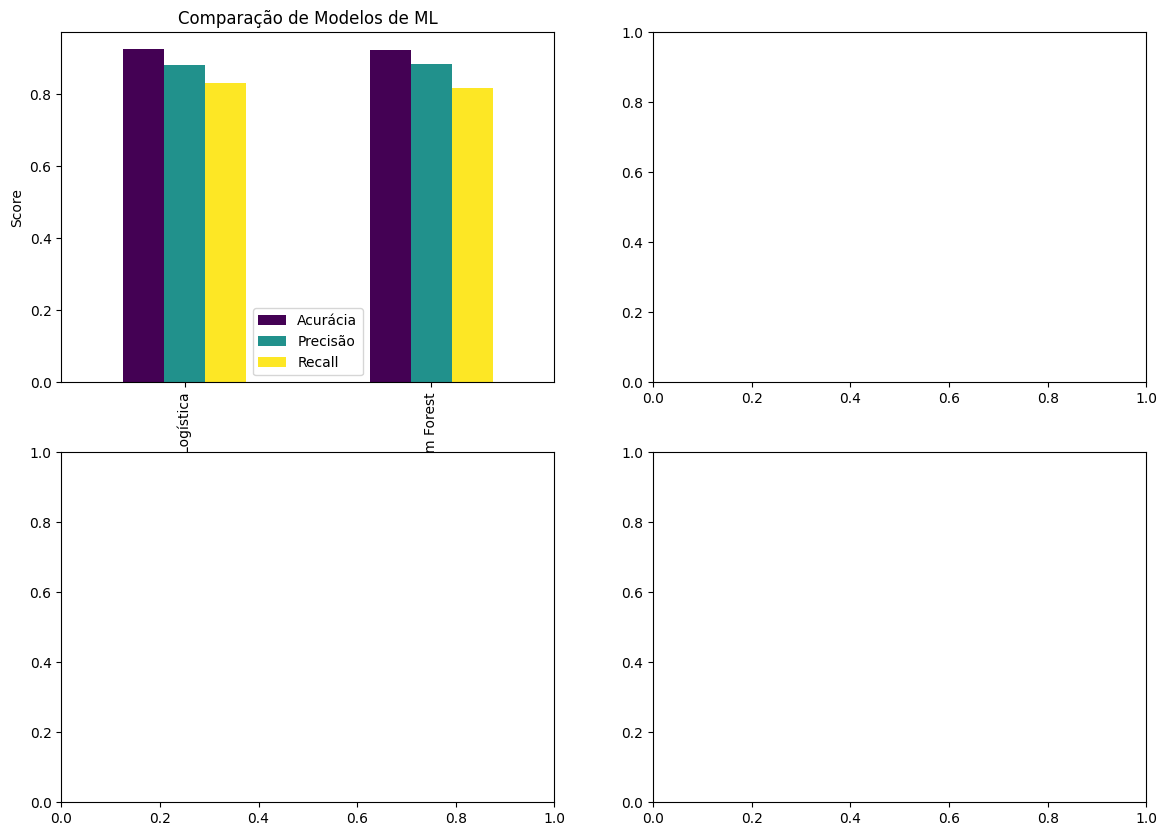

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Comparação dos modelos (barplot)
results_df.plot(
    x="Modelo", y=["Acurácia", "Precisão", "Recall"], kind="bar",
    ax=axes[0,0], colormap="viridis"
)
axes[0,0].set_title("Comparação de Modelos de ML")
axes[0,0].set_ylabel("Score")

In [49]:
# 2. Clientes por cluster
sns.countplot(x="Cluster", data=df, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Número de Clientes por Cluster")


Text(0.5, 1.0, 'Número de Clientes por Cluster')

In [53]:
# 3. Churn por cluster
sns.barplot(x=churn_by_cluster.index, y=churn_by_cluster.values,
            palette="coolwarm", ax=axes[1,0])
axes[1,0].set_title("Taxa de Churn por Cluster")
axes[1,0].set_xlabel("Cluster")
axes[1,0].set_ylabel("Proporção de Churn")




Text(24.000000000000007, 0.5, 'Proporção de Churn')

In [51]:

# 4. Lifetime médio por cluster
sns.barplot(x=cluster_summary.index, y=cluster_summary["Lifetime"],
            palette="Blues", ax=axes[1,1])
axes[1,1].set_title("Lifetime Médio por Cluster")
axes[1,1].set_xlabel("Cluster")
axes[1,1].set_ylabel("Meses")

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

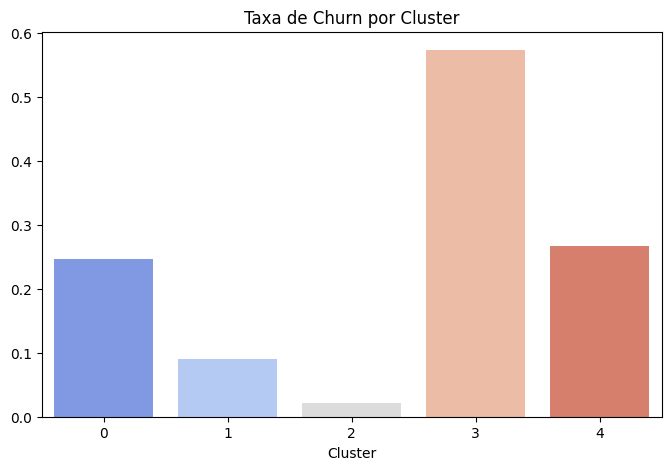

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x=churn_by_cluster.index, y=churn_by_cluster.values, palette="coolwarm")
plt.title("Taxa de Churn por Cluster")
plt.savefig("churn_por_cluster.png")
plt.show()


### Conclusão Final — Análise de Churn da Model Fitness
* 1. **Modelagem de Churn**

Testamos dois modelos preditivos: Regressão Logística e Random Forest.

Ambos apresentaram alta acurácia (~92%).

A Regressão Logística teve um recall ligeiramente superior (0,83), o que é essencial para identificar clientes em risco de churn.

Conclusão: A Regressão Logística é o modelo mais indicado para prever churn e apoiar decisões de retenção de clientes.

* 2. **Clusterização de Clientes**

Aplicamos KMeans com 5 clusters após padronizar os dados.

Cada cluster apresentou perfis diferentes em Lifetime, frequência de aulas e gastos adicionais.

Alguns clusters mostraram taxas de churn significativamente maiores, permitindo identificar grupos mais vulneráveis.

* 3. **Insights e Recomendações**

Clusters de maior churn são compostos por clientes com:

Baixo Lifetime (menos tempo na academia)

Baixa frequência de aulas

Menor gasto adicional

Clusters mais leais possuem clientes com maior engajamento, frequência de aulas mais alta e maior gasto adicional.

Ações recomendadas:

Promoções e incentivos personalizados para clientes em risco.

Programas de fidelidade e planos mais longos para aumentar o Lifetime.

Campanhas de engajamento para clientes com frequência baixa de aulas.

* 4. **Conclusão Estratégica**

A combinação de previsão de churn + clusterização de clientes permite priorizar esforços de retenção de forma mais eficiente.

Estratégias focadas nos grupos de risco podem reduzir a rotatividade e aumentar a satisfação do cliente.

Este estudo fornece uma base sólida para tomada de decisão orientada a dados na Model Fitness.